In [144]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import confusion_matrix

Exercise 1 - Titanic

In [69]:
df = pd.read_csv("titanic.csv").copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
df["Sex"] = df["Sex"].replace({"male": 1, "female": 0})

df["Age"] = df["Age"].replace(to_replace=np.nan, value=999)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    1   22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0   38.0      1   
2                               Heikkinen, Miss. Laina    0   26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   35.0      1   
4                             Allen, Mr. William Henry    1   35.0      0   
..                                                 ...  ...    ...    ...   
886 

/var/folders/mn/3zs_6q7s7zx9ygqzqn83mnjr0000gn/T/ipykernel_51475/3024338126.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace({"male": 1, "female": 0})


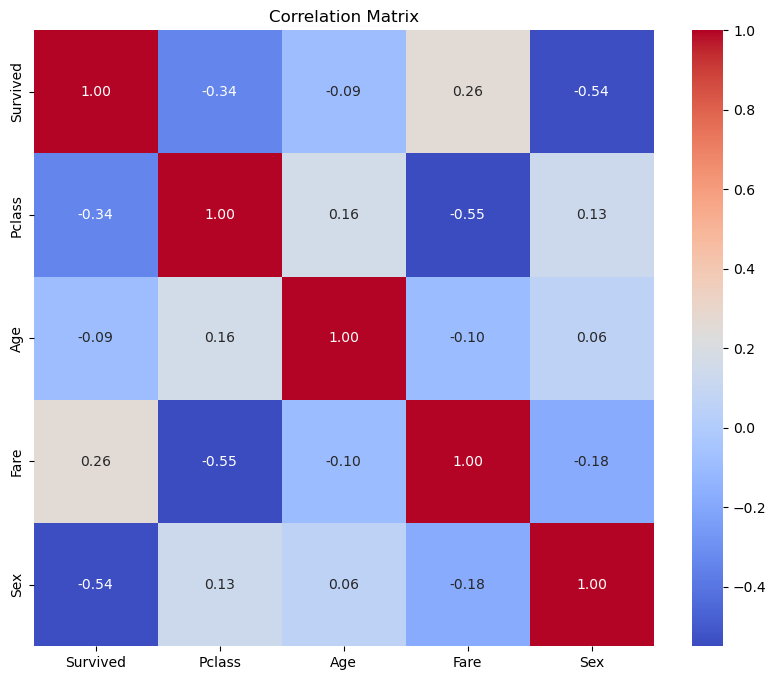

In [77]:
considered = ["Survived", "Pclass", "Age", "Fare", "Sex"]
corr_mat = df[considered].corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr_mat, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [78]:
df[considered].describe()

,Survived,Pclass,Age,Fare,Sex
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,222.253838,32.204208,0.647587
std,0.486592,0.836071,387.173404,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,32.000000,14.454200,1.000000
75%,1.000000,3.000000,54.000000,31.000000,1.000000
max,1.000000,3.000000,999.000000,512.329200,1.000000


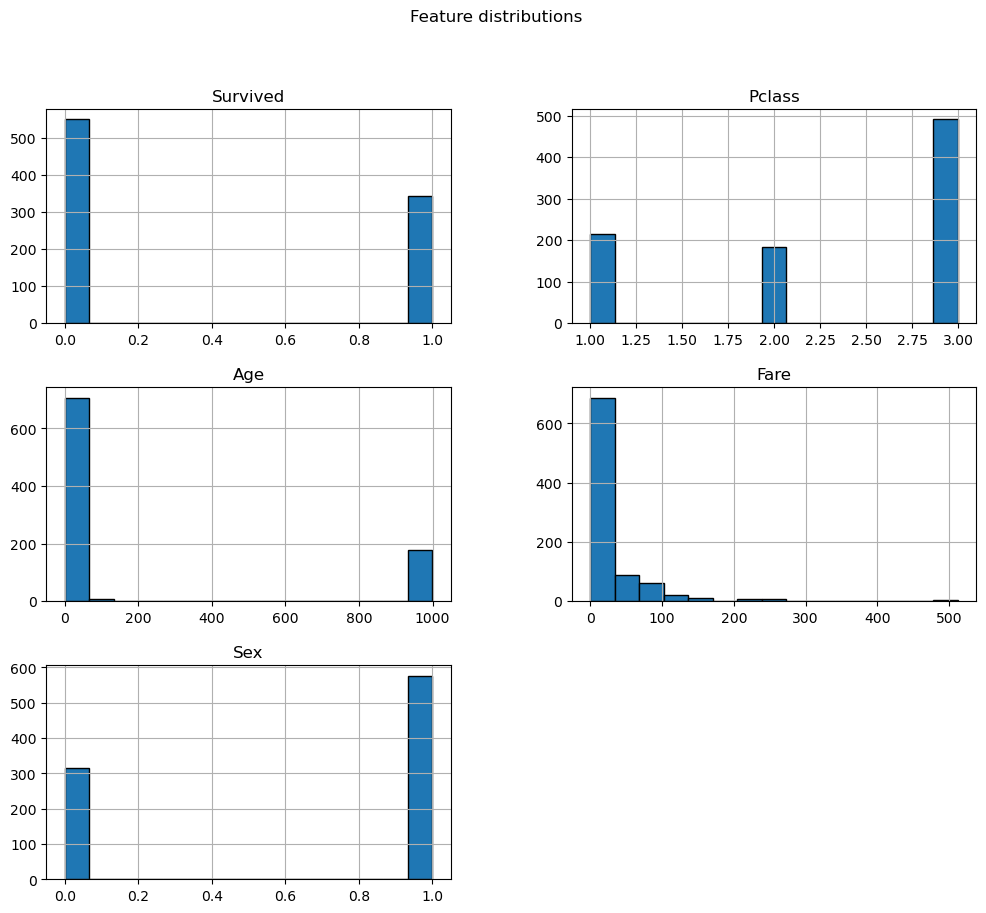

In [79]:
df[considered].hist(figsize= (12,10), bins= 15, edgecolor= "black")
plt.suptitle("Feature distributions")
plt.show()

In [80]:
X = df[["Pclass", "Age", "Fare", "Sex"]]
Y = df["Survived"]

X_train, X_mid, Y_train, Y_mid = train_test_split(X, Y, test_size=0.4, random_state= 7976)

X_validate, X_test, Y_validate, Y_test = train_test_split(X_mid, Y_mid, test_size= 0.5, random_state= 7976)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_validate.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 534
Validation set size: 178
Test set size: 179


In [81]:
print(df["Age"].max())

999.0


In [82]:
model = LogisticRegression()
model.fit(X_train, Y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [2.65431454]
Coefficients: [[-7.18022609e-01 -2.24469596e-04  5.53406016e-04 -2.25910686e+00]]


People from higher classes were more likely to have died?
Age ? 
Sex: for every man that survived 2.26 women survived

In [90]:
pred_train_Y = model.predict(X_train)
pred_train_Y_proba = model.predict_proba(X_train)

print(f"Training set - Predicted labels: {pred_train_X}")
print(f"Training set - Predicted probabilities: {pred_train_X_proba}")

Training set - Predicted labels: [0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0
 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0
 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 

In [94]:
conf_mat_train = confusion_matrix(Y_train, pred_train_Y)
print(f"Training set - confusion matrix:")
print(conf_mat_train)

Training set - confusion matrix:
[[270  51]
 [ 73 140]]


In [105]:
TP = conf_mat_train[0,0]
TN = conf_mat_train[1,1]
FN = conf_mat_train[0,1]
FP = conf_mat_train[1,0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * ((precision*recall) / (precision+recall))

print("Evaluation Metrics: Training Set")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Evaluation Metrics: Training Set
Accuracy: 0.77
Precision: 0.79
Recall: 0.84
F1 Score: 0.81


In [93]:
pred_valid_Y = model.predict(X_validate)
pred_valid_Y_proba = model.predict_proba(X_validate)

print(f"Validation Set - Predicted Y: {pred_valid_Y}")
print(f"Validation Set - Probability of predicted Y: {pred_valid_Y_proba}")

Validation Set - Predicted Y: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0
 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1]
Validation Set - Probability of predicted Y: [[0.85310797 0.14689203]
 [0.85004138 0.14995862]
 [0.87809658 0.12190342]
 [0.87855567 0.12144433]
 [0.85340942 0.14659058]
 [0.85099803 0.14900197]
 [0.42933144 0.57066856]
 [0.73594055 0.26405945]
 [0.85339942 0.14660058]
 [0.85302847 0.14697153]
 [0.85308313 0.14691687]
 [0.5751842  0.4248158 ]
 [0.85327869 0.14672131]
 [0.85299754 0.14700246]
 [0.22828519 0.77171481]
 [0.85253683 0.14746317]
 [0.73639556 0.26360444]
 [0.85388444 0.14611556]
 [0.85295859 0.14704141]
 [0.85349269 0.14650731]
 [0.73987437 0.26012563]
 [0.3735293  0.6264707 ]
 [0.85333632 

In [95]:
conf_mat_valid = confusion_matrix(Y_validate, pred_valid_Y)
print("Validataion set - Confusion matrix")
print(conf_mat_valid)

Validataion set - Confusion matrix
[[101  17]
 [ 20  40]]


In [104]:
TP_valid = conf_mat_valid[0,0]
TN_valid = conf_mat_valid[1,1]
FN_valid = conf_mat_valid[0,1]
FP_valid = conf_mat_valid[1,0]

accuracy_valid = (TP_valid + TN_valid) / (TP_valid + TN_valid + FP_valid + FN_valid)
precision_valid = TP_valid / (TP_valid + FP_valid) if (TP_valid + FP_valid) > 0 else 0
recall_valid = TP_valid / (TP_valid + FN_valid) if (TP_valid + FN_valid) > 0 else 0
f1_score_valid = 2 * ((precision_valid*recall_valid) / (precision_valid+recall_valid))

print("Evaluation Metrics: Validation Set")
print(f"Accuracy: {accuracy_valid:.2f}")
print(f"Precision: {precision_valid:.2f}")
print(f"Recall: {recall_valid:.2f}")
print(f"F1 Score: {f1_score_valid:.2f}")


Evaluation Metrics: Validation Set
Accuracy: 0.79
Precision: 0.83
Recall: 0.86
F1 Score: 0.85


Precision and recall are not bad but we would hope for a higher recall value (considering that otherwise we are considering people who are alive to be dead).

Meaning of F1 score and historical context of titanic to be determined

Method 2: Using Gradient Boosting Classifier instead of Logistic Regression

In [84]:
model2 = GradientBoostingClassifier()
X2_train = X_train.copy()
Y2_train = Y_train.copy()

model2.fit(X2_train, Y2_train)

print(f"Feature Importances: {model2.feature_importances_}")

Feature Importances: [0.15479568 0.16698553 0.2601178  0.41810099]


In [85]:
X2_validate = X_validate.copy()
X2_test = X_test.copy()
Y2_validate = Y_validate.copy()
Y2_test = Y_test.copy()

In [86]:
pred_train_X2 = model2.predict(X2_train)
pred_train_X2_proba = model

Exercise 2 - Heart Disease

In [107]:
hrds = pd.read_csv("heart_disease_uci.csv").copy()
hrds.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [108]:
hrds.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [113]:
hrds["sex"] = hrds["sex"].replace({"Male": 1, "Female": 0})
hrds["cp"] = hrds["cp"].replace({"asymptomatic": 3, "typical angina": 2, "atypical angina": 1, "non-anginal": 0})
hrds["fbs"] = hrds["fbs"].replace({"True": 1, "False": 0})
hrds["restecg"] = hrds["restecg"].replace({"normal": 0, "lv hypertrophy": 1, "st-t abnormality": 2})
hrds["exang"] = hrds["exang"].replace({"True": 1, "False": 0})
hrds["slope"] = hrds["slope"].replace({"upsloping": 0, "flat": 1, "downsloping": 2})
hrds["thal"] = hrds["thal"].replace({"fixed defect": 1, "reversable defect": 2, "normal": 0})



/var/folders/mn/3zs_6q7s7zx9ygqzqn83mnjr0000gn/T/ipykernel_51475/425415923.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hrds["thal"] = hrds["thal"].replace({"fixed defect": 1, "reversable defect": 2, "normal": 0})


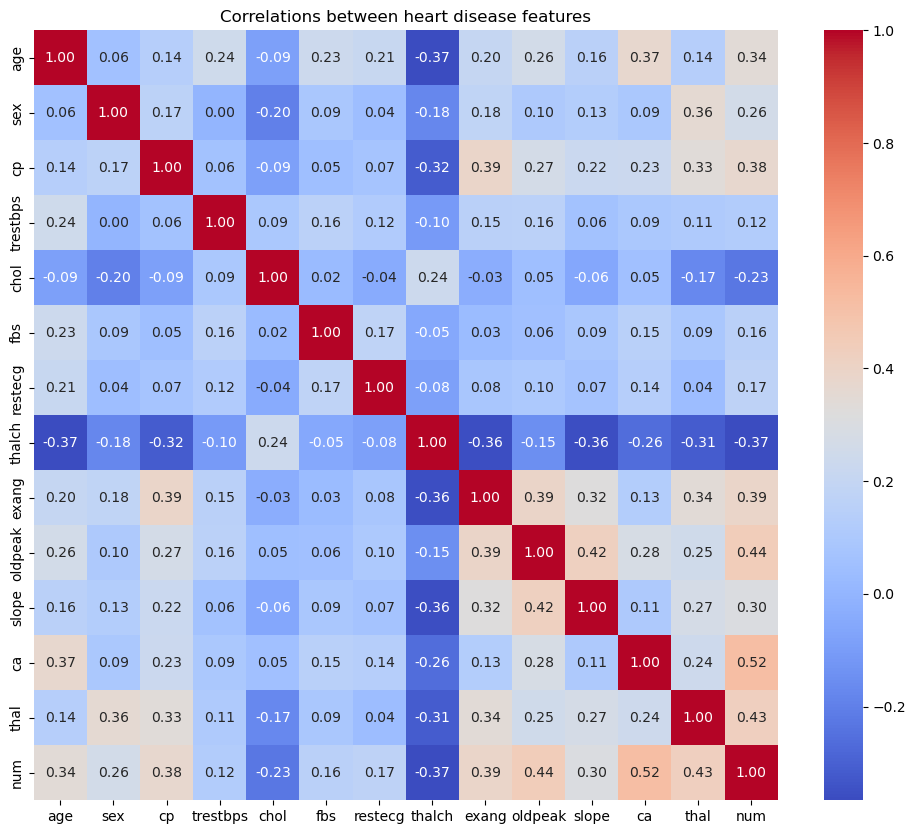

In [117]:
features = ["age",	"sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalch", "exang", "oldpeak", "slope", "ca", "thal", "num"]
correl = hrds[features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correl, annot= True, cmap="coolwarm", fmt= ".2f")
plt.title("Correlations between heart disease features")
plt.show()

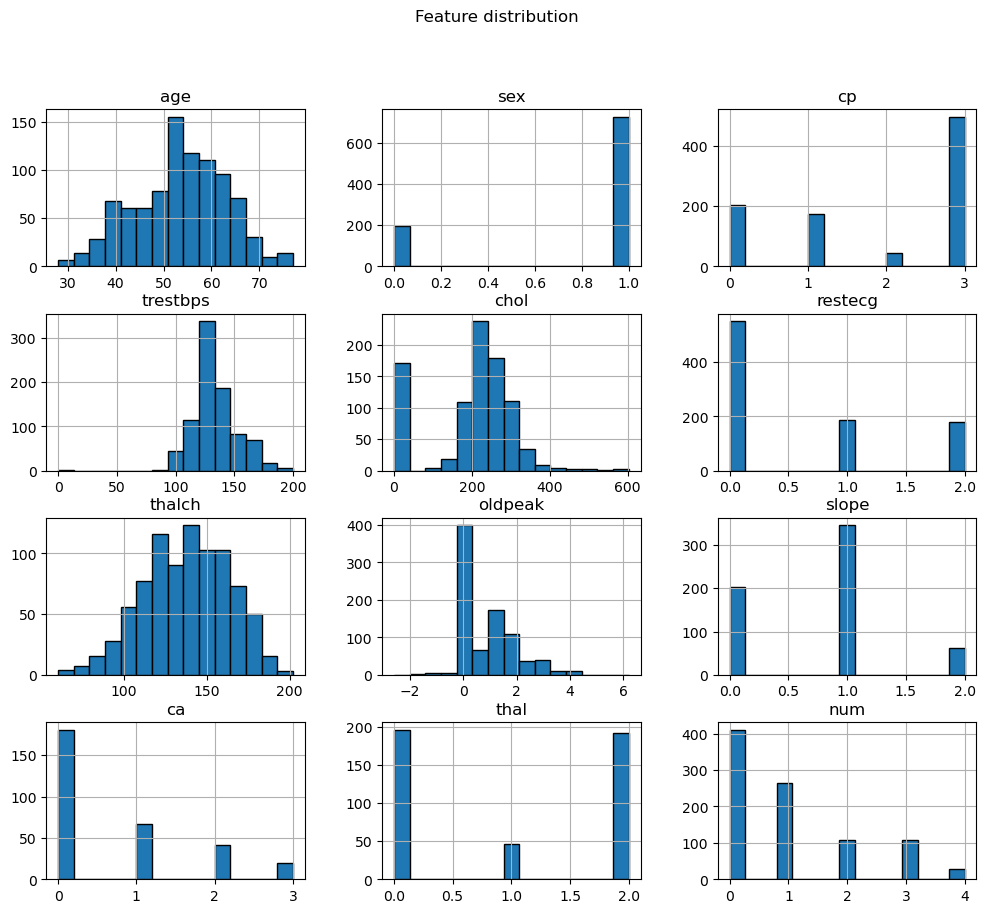

In [118]:
hrds[features].hist(figsize = (12, 10), bins = 15, edgecolor = "black")
plt.suptitle("Feature distribution")
plt.show()

In [137]:
print(np.sum(hrds[features].isnull()))

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [138]:
hrds["trestbps"] = hrds["trestbps"].replace(to_replace=np.nan, value=999)
hrds["chol"] = hrds["chol"].replace(to_replace=np.nan, value=999)
hrds["thalch"] = hrds["thalch"].replace(to_replace=np.nan, value=999)
hrds["fbs"] = hrds["fbs"].replace(to_replace=np.nan, value=10)
hrds["restecg"] = hrds["restecg"].replace(to_replace=np.nan, value=10)
hrds["exang"] = hrds["exang"].replace(to_replace=np.nan, value=10)
hrds["oldpeak"] = hrds["oldpeak"].replace(to_replace=np.nan, value=60)
hrds["slope"] = hrds["slope"].replace(to_replace=np.nan, value=10)
hrds["ca"] = hrds["ca"].replace(to_replace=np.nan, value=30)
hrds["thal"] = hrds["thal"].replace(to_replace=np.nan, value=10)

In [139]:
hrx = hrds[["age",	"sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalch", "exang", "oldpeak", "slope", "ca", "thal"]]
hry = hrds["num"]

hrx_train, hrx_mid, hry_train, hry_mid = train_test_split(hrx, hry, test_size=0.4, random_state=7976)
hrx_valid, hrx_test, hry_valid, hry_test = train_test_split(hrx_mid, hry_mid, test_size=0.5, random_state=7976)

print(f"Shape of training data: {hrx_train.shape[0]}")
print(f"Shape of training data: {hrx_valid.shape[0]}")
print(f"Shape of training data: {hrx_test.shape[0]}")

Shape of training data: 552
Shape of training data: 184
Shape of training data: 184


In [145]:
scaler = StandardScaler()
hrx_train_scale = scaler.fit_transform(hrx_train)

hr_model = LogisticRegression()
hr_model.fit(hrx_train_scale, hry_train)

print(f"Training set - intercept: {hr_model.intercept_}")
print(f"Training set - coefficients: {hr_model.coef_}")

Training set - intercept: [ 1.27208825  1.03445659 -0.41692239 -0.51628465 -1.3733378 ]
Training set - coefficients: [[-5.30545779e-01 -5.30427387e-01 -6.46498679e-01 -1.19649534e-01
   2.27156624e-01 -2.71090286e-01 -9.42884675e-02  1.75354787e+00
  -1.64100804e+00 -1.86370057e-01  5.00099196e-01 -3.08795079e-01
   4.27171985e-01]
 [-3.19246299e-01 -1.07992249e-03 -3.25971530e-02 -5.26909407e-01
   2.33253818e-01  1.32433064e-01 -4.22933744e-02 -3.28268280e-01
   6.99534823e-01 -1.54130381e-01  3.23018778e-02  3.45544832e-01
   1.03229264e-01]
 [ 2.78860937e-01  1.78485351e-01  4.39621543e-01 -2.10774926e-01
  -8.57539508e-03  1.95497656e-01 -2.70290852e-02  4.72062661e-01
   4.79154111e-02 -2.01682932e-01  1.07724336e-02  3.74916186e-01
  -5.05137979e-01]
 [ 4.36208891e-01  2.64232811e-01  9.94808194e-02  3.34959495e-01
  -5.44626588e-02  1.18476369e-01 -8.22239852e-03 -1.38462025e+00
   1.04550567e+00  4.39534318e-01 -4.53168789e-01  3.33444933e-02
  -3.03626681e-01]
 [ 1.34722249e-

In [150]:
pred_hr_train = hr_model.predict(hrx_train.values)
pred_hr_prob_train = hr_model.predict_proba(hrx_train.values)

print(f"Heart disease predictions: {pred_hr_train}")
print(f"Heart disease predictions probabilities: {pred_hr_prob_train}")

Heart disease predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [151]:
hr_conf_train = confusion_matrix(hry_train, pred_hr_train)

print("Heart Disease Confusion Matrix")
print(hr_conf_train)

Heart Disease Confusion Matrix
[[244   0   0   0   0]
 [160   0   0   0   0]
 [ 58   0   0   0   0]
 [ 68   0   0   0   2]
 [ 19   0   0   0   1]]


In [ ]:
TP_hrvalid = hr_conf_train[0,0]
TN_hrvalid = conf_mat_valid[1,1]
FN_hrvalid = conf_mat_valid[0,1]
FP_hrvalid = conf_mat_valid[1,0]

accuracy_valid = (TP_valid + TN_valid) / (TP_valid + TN_valid + FP_valid + FN_valid)
precision_valid = TP_valid / (TP_valid + FP_valid) if (TP_valid + FP_valid) > 0 else 0
recall_valid = TP_valid / (TP_valid + FN_valid) if (TP_valid + FN_valid) > 0 else 0
f1_score_valid = 2 * ((precision_valid*recall_valid) / (precision_valid+recall_valid))

print("Evaluation Metrics: Validation Set")
print(f"Accuracy: {accuracy_valid:.2f}")
print(f"Precision: {precision_valid:.2f}")
print(f"Recall: {recall_valid:.2f}")
print(f"F1 Score: {f1_score_valid:.2f}")

Exercise 3 - Wine Quality